In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [39]:
data_dir=os.path.abspath("../data/")
sub="sub-1001"
sub_dir=data_dir+"/"+sub

events=[]
for root, dirs, files in os.walk(sub_dir):
    for f in files:
        if f.endswith("events.csv"):
            events.append(os.path.join(root,f))
display(events)

['/home/jeff/Projects/InProgress/istart/risk_amb/data/sub-1001/sub-1001_task-ambiguity_events.csv',
 '/home/jeff/Projects/InProgress/istart/risk_amb/data/sub-1001/sub-1001_task-risk_events.csv']

In [43]:
df_a=pd.read_csv(events[0])
df_r=pd.read_csv(events[1])
df_r['choose_lot']=np.logical_and(df_r.LotisLeft==1,df_r.response=="['f']")
display(df_r.head())
df_a['choose_risk']=np.logical_and(df_a.RiskisLeft==1,df_a.response=="['f']")

display(df_a.head())

,LotisLeft,Lot_per,Lot_mon,Lot_color,Sure_mon,dist,response,RT,choose_lot
0,1,10,13,blue,7,wide,['j'],4.146035,False
1,0,0,13,blue,7,wide,['f'],2.024450,False
2,0,0,13,blue,7,wide,['f'],1.240390,False
3,1,90,13,blue,7,wide,['f'],1.525565,True
4,0,100,13,blue,7,wide,['j'],1.704006,False


,Risk_per,Money,Color,Amb,RiskisLeft,response,RT,dist,choose_risk
0,20,8,blue,100,0,['f'],2.662200,wide,False
1,30,8,blue,100,1,['j'],2.286832,wide,False
2,40,8,blue,100,0,['f'],1.986790,wide,False
3,50,8,blue,100,1,['j'],3.408539,wide,False
4,60,8,blue,100,0,['j'],1.825292,wide,False


/home/jeff/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


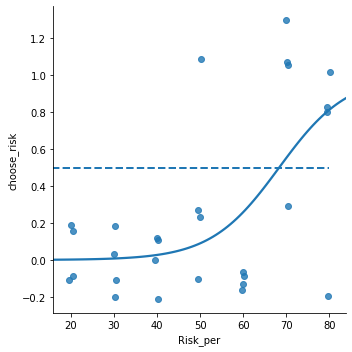

In [47]:
import matplotlib.pyplot as plt
plotData=df_a[df_a['Amb']==100]
sns.lmplot(x='Risk_per',y='choose_risk', data=plotData,logistic=True,x_jitter=0.5,y_jitter=0.3)
plt.plot([0,80], [0.5,0.5], linewidth=2,linestyle='dashed')

/home/jeff/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


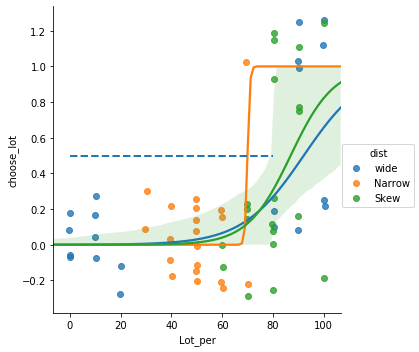

In [45]:
import matplotlib.pyplot as plt
plotData=df_r
sns.lmplot(x='Lot_per',y='choose_lot', data=plotData ,hue='dist',logistic=True,x_jitter=0.5,y_jitter=0.3)
plt.plot([0,80], [0.5,0.5], linewidth=2,linestyle='dashed')